## Observations and Insights 

1 - Average tumor size is smaller with Capomulin and Ramicane vs. Infubiol and Ceftamin regimens. 

2 - There is a strong positive correlation with size of tumor and weight of mice.

3 - There is an outlier sample in the Infubinol regimen study. 





In [218]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how = "left")

# Display the data table for preview
merged_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [136]:
# Checking the number of mice.
total_mice = merged_data["Mouse ID"].value_counts()
len(total_mice)


249

In [137]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data.loc[merged_data.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"]
print(duplicate_mice)

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


In [138]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = pd.DataFrame(duplicate_mice)
duplicate_mice_df.head()

,Mouse ID
909,g989
911,g989
913,g989
915,g989
917,g989


In [139]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mice)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [140]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = clean_data["Mouse ID"].value_counts()
len(total_mice_clean)

248

## Summary Statistics

In [141]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Groupby Drug Regimen
gb_drug = clean_data.groupby("Drug Regimen")

# Mean Tumor Volume
mean_tumor = gb_drug["Tumor Volume (mm3)"].mean()

# Median Tumor Volume
median_tumor = gb_drug["Tumor Volume (mm3)"].median()

# Varince of Tumor Volume
variance_tumor = gb_drug["Tumor Volume (mm3)"].var()

# STD of Tumor Volume
std_tumor = gb_drug["Tumor Volume (mm3)"].std()

# SEM of Tumor Volume 
sem_tumor = gb_drug["Tumor Volume (mm3)"].sem()


In [142]:
# Create DataFrame with stat summary by Drug Regimen
tumor_vol_summ = pd.DataFrame({"Mean Tumor Vol.": mean_tumor,
                                    "Median Tumor Vol.": median_tumor,
                                    "Variance of Tumor Vol.": variance_tumor,
                                    "Standard Deviation of Tumor Vol.": std_tumor,
                                    "Standard Error of the Mean of Tumor Vol.": sem_tumor
                                   })
tumor_vol_summ


,Mean Tumor Vol.,Median Tumor Vol.,Variance of Tumor Vol.,Standard Deviation of Tumor Vol.,Standard Error of the Mean of Tumor Vol.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


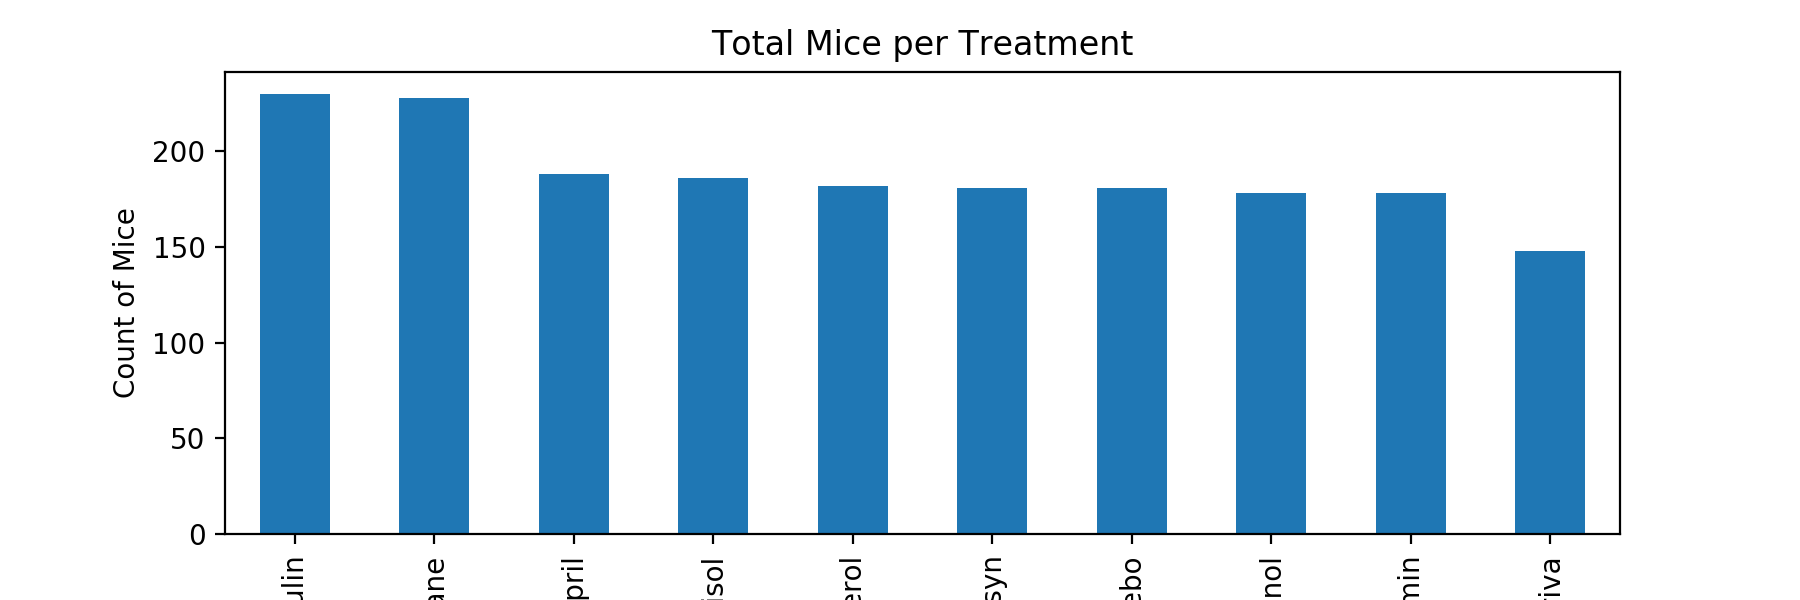

Text(0, 0.5, 'Count of Mice')

In [143]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Get mice count for course of studies
sum_of_mice = gb_drug["Mouse ID"].count().sort_values(ascending = False)

# Use DataFrame plot
mice_pd_plot = sum_of_mice.plot(kind="bar", figsize = (9,3))

# Set title and y label
plt.title("Total Mice per Treatment")
plt.ylabel("Count of Mice")


<IPython.core.display.Javascript object>


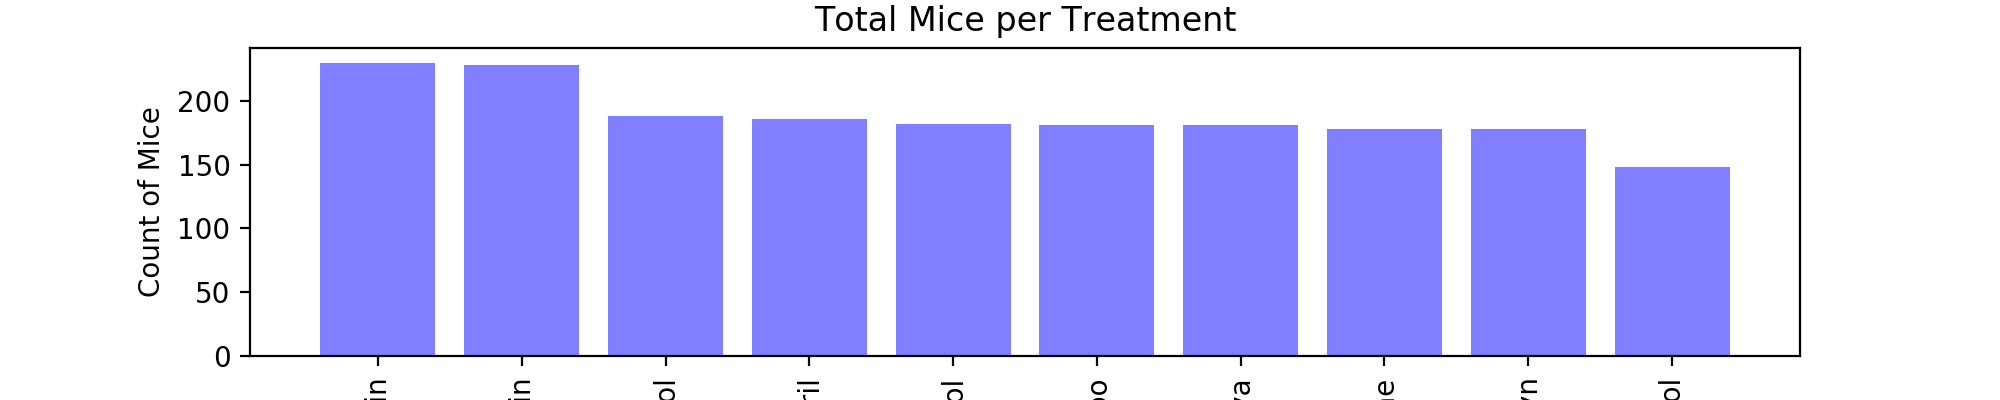

Text(0, 0.5, 'Count of Mice')

In [145]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(gb_drug))
tick_locations = [value for value in x_axis]

sum_of_mice = gb_drug["Mouse ID"].count().sort_values(ascending = False)


# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,2))
plt.bar(x_axis, sum_of_mice, color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

# Give the chart a title, x label, and y label
plt.title("Total Mice per Treatment")
plt.xlabel("Treatment")
plt.ylabel("Count of Mice")



In [147]:
# Groupby sex
gb_sex = clean_data.groupby("Sex")

# Count of male/female mice
mice_sex = gb_sex["Sex"].count()

# Total count of mice
mice_total = mice_sex.sum()


# Percent of male mice
male_mice_sex = clean_data["Sex"] == "Male"
male_mice_sex_sum = male_mice_sex.sum()
percent_male = round(male_mice_sex_sum / mice_total * 100)

# Percent of female mice 
female_mice_sex = clean_data["Sex"] == "Female"
female_mice_sex_sum = female_mice_sex.sum()
percent_female = round(female_mice_sex_sum / mice_total * 100)

# Create DataFrame for mice sex distribut
mice_sex_df = pd.DataFrame({"Mice Count": mice_sex,
                         "Mice Count Percent": [percent_female, percent_male]
                           })
mice_sex_df

,Mice Count,Mice Count Percent
Sex,,
Female,922,49.0
Male,958,51.0


<IPython.core.display.Javascript object>


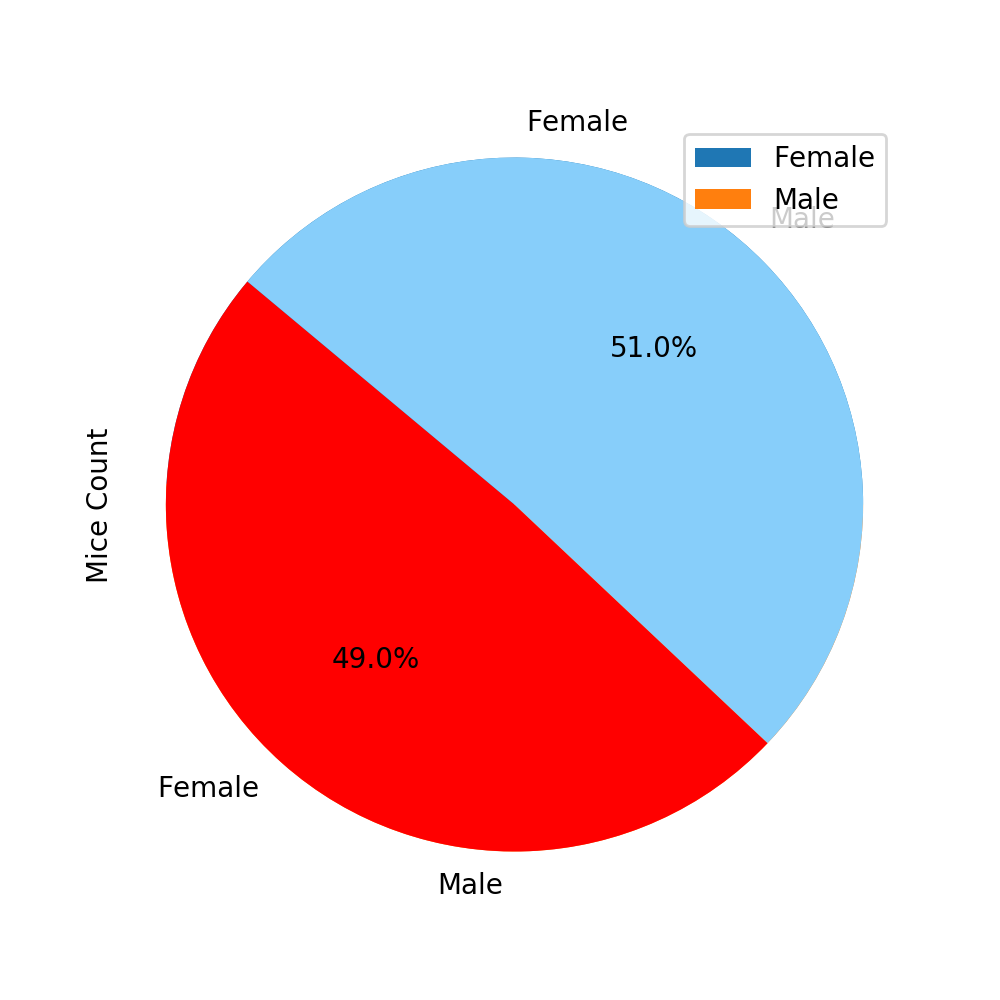

In [148]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pandas_pie = mice_sex_df.plot.pie(y="Mice Count", figsize= (5,5))
pandas_pie


In [149]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [922, 958]

# The colors of each section of the pie chart
colors = ["red", "lightskyblue"]


In [150]:
# Creates the pie chart based upon the values above
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [231]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Create DataFrames for each treatment
capomulin = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
ramicane = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane"]
infubinol = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol"]
ceftamin = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin"]

# Check for max time point and merge DataFrames
capomulin_max = capomulin.groupby("Mouse ID").max()["Timepoint"]
capomulin_max_df = pd.DataFrame(capomulin_max)
capomulin_merge = pd.merge(capomulin_max_df, clean_data, on=("Mouse ID", "Timepoint"),how="left")

ramicane_max = ramicane.groupby("Mouse ID").max()["Timepoint"]
ramicane_max_df = pd.DataFrame(ramicane_max)
ramicane_merge = pd.merge(ramicane_max_df, clean_data, on=("Mouse ID", "Timepoint"),how="left")

infubinol_max = infubinol.groupby("Mouse ID").max()["Timepoint"]
infubinol_max_df = pd.DataFrame(infubinol_max)
infubinol_merge = pd.merge(infubinol_max_df, clean_data, on=("Mouse ID", "Timepoint"),how="left")

ceftamin_max = ceftamin.groupby("Mouse ID").max()["Timepoint"]
ceftamin_max_df = pd.DataFrame(ceftamin_max)
ceftamin_merge = pd.merge(ceftamin_max_df, clean_data, on=("Mouse ID", "Timepoint"),how="left")


In [232]:
# Determine quartiles and IQR, and outliers using upper and lower bounds

capomulin_quartile = capomulin_merge["Tumor Volume (mm3)"]

quartiles = capomulin_quartile.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Treatment: Capomulin")
print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 
print("-----------------------------------------------------------")

ramicane_quartile = ramicane_merge["Tumor Volume (mm3)"]

quartiles = ramicane_quartile.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Treatment: Ramicane")
print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 
print("-----------------------------------------------------------")

infubinol_quartile = infubinol_merge["Tumor Volume (mm3)"]

quartiles = infubinol_quartile.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Treatment: Infubinol")
print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 
print("-----------------------------------------------------------")

ceftamin_quartile = ceftamin_merge["Tumor Volume (mm3)"]

quartiles = ceftamin_quartile.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Treatment: Ceftamin")
print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 
print("-----------------------------------------------------------")
    

Treatment: Capomulin
The lower quartile of treatment is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-----------------------------------------------------------
Treatment: Ramicane
The lower quartile of treatment is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-----------------------------------------------------------
Treatment: Infubinol
The lower quartile of treatment is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518

<IPython.core.display.Javascript object>


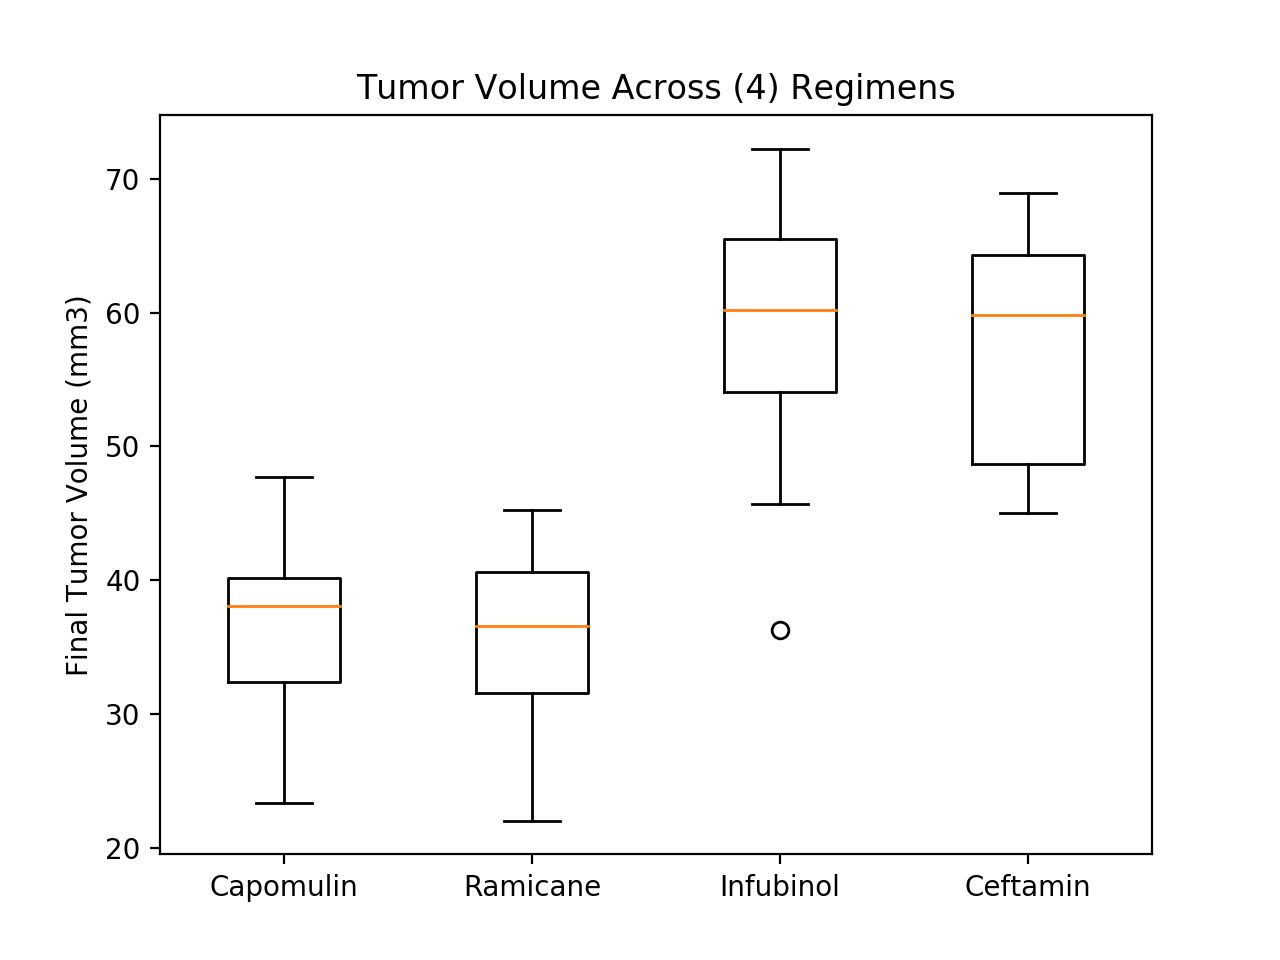

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff07eed8f50>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff07eef1490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff07eeed090>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff07eef1e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff07eef83d0>,
 'means': []}

In [233]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatment_list = [capomulin_quartile, ramicane_quartile, infubinol_quartile, ceftamin_quartile]
x_tick = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume Across (4) Regimens")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(treatment_list, labels= x_tick)



## Line and Scatter Plots

<IPython.core.display.Javascript object>


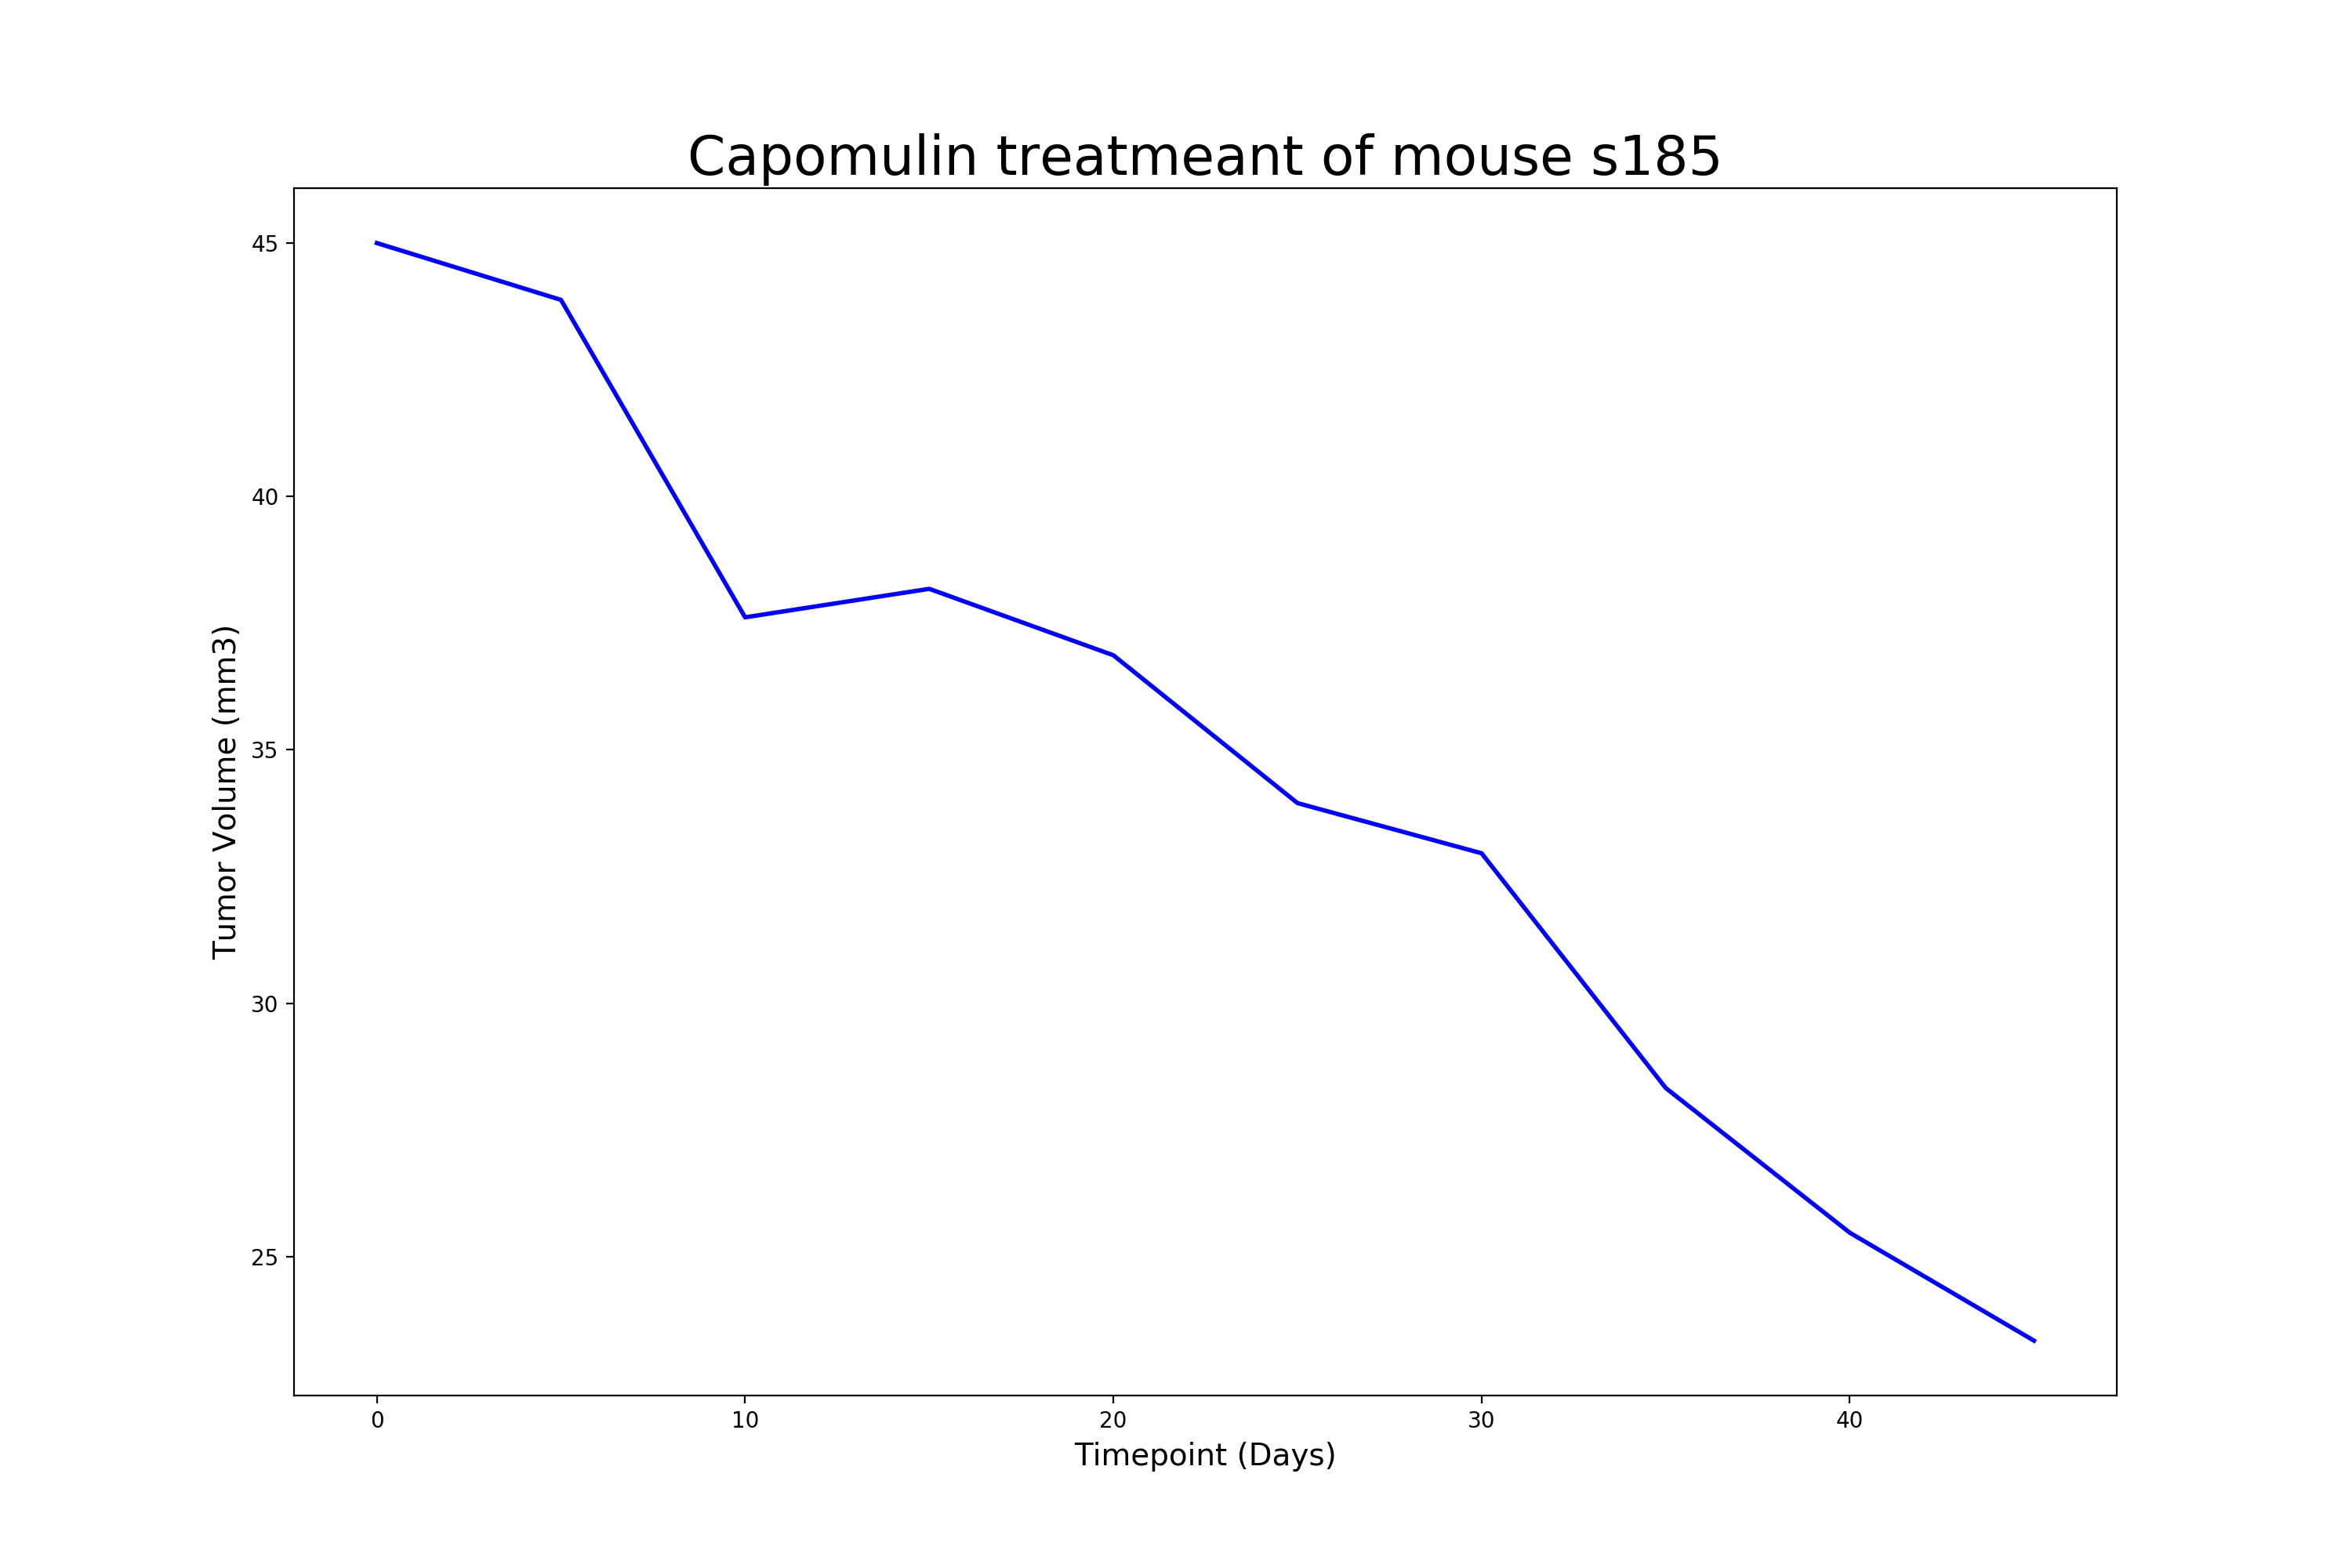

Text(0, 0.5, 'Tumor Volume (mm3)')

In [234]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_capomulin = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", :]
s185_capomulin = mouse_capomulin.loc[mouse_capomulin["Mouse ID"] == "s185", :]


x_axis = s185_capomulin["Timepoint"]
tumor_vol = s185_capomulin["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse s185',fontsize =25)
plt.plot(x_axis, tumor_vol,linewidth=2, markersize=15,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)



<IPython.core.display.Javascript object>


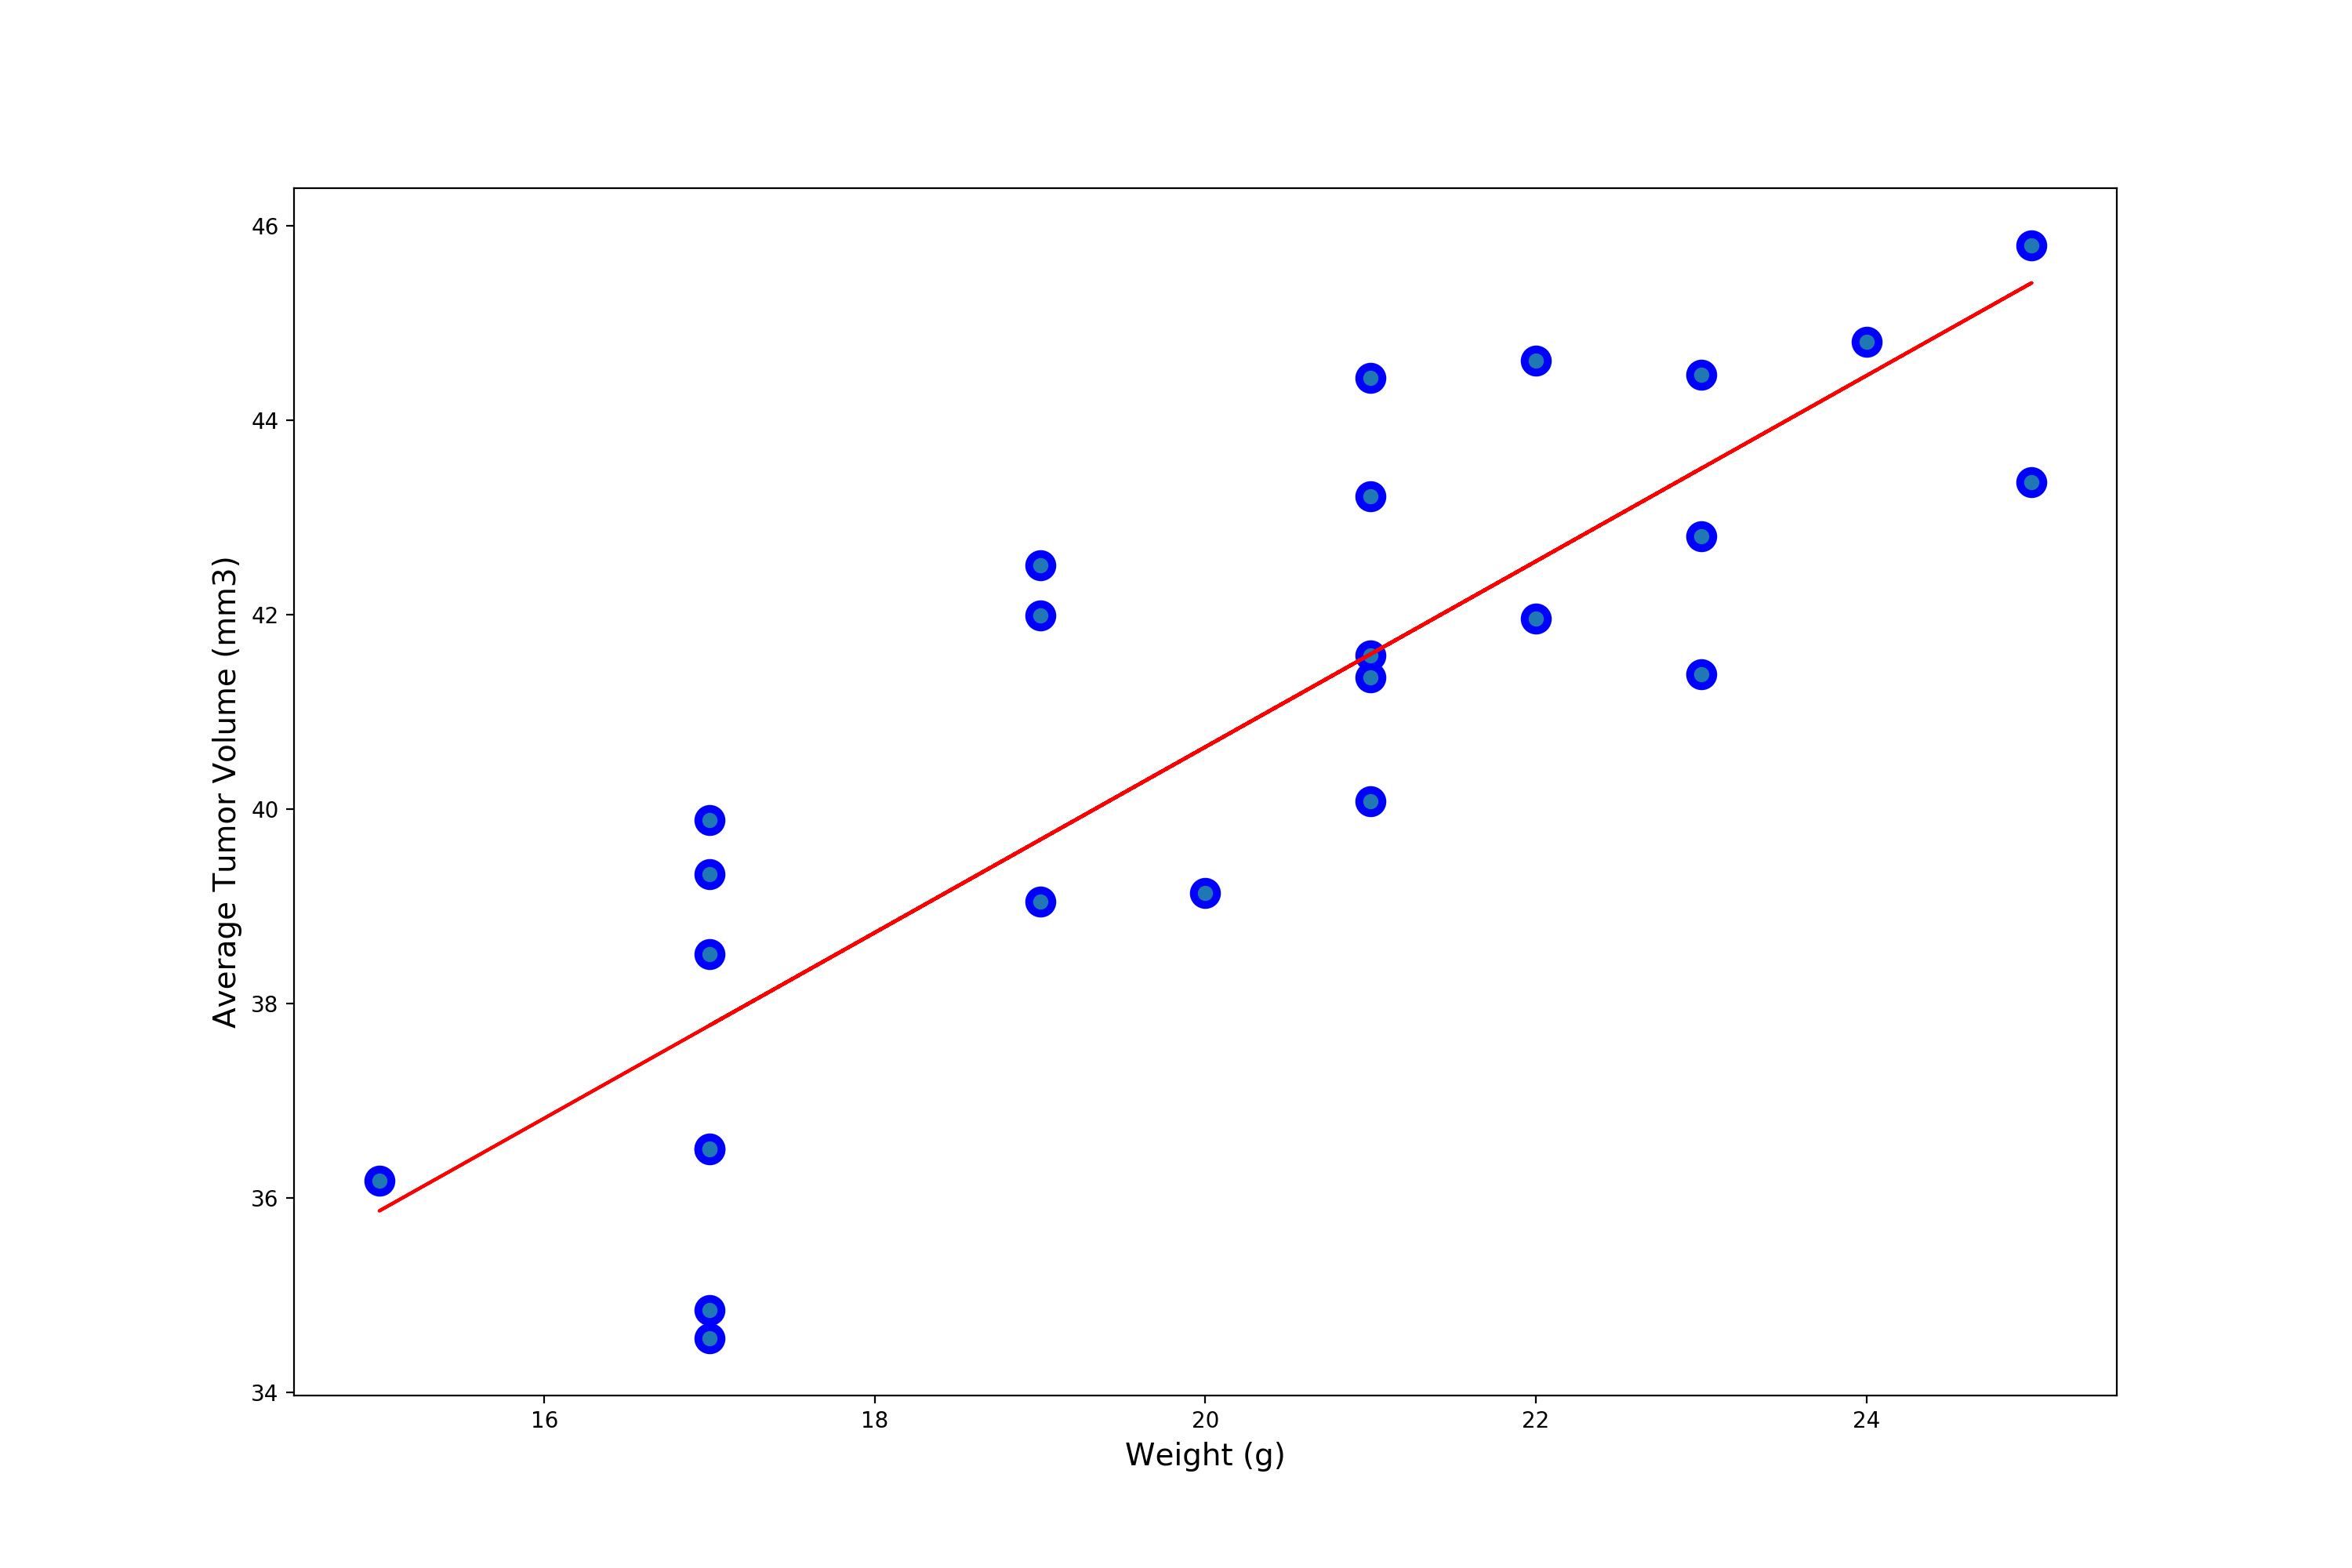

Text(0, 0.5, 'Average Tumor Volume (mm3)')

In [176]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(15, 10))
average_tumor  = mouse_capomulin.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(average_tumor['Weight (g)'],average_tumor['Tumor Volume (mm3)'],s=175, color="blue")
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =14)




## Correlation and Regression

In [170]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Compute Pearson correlation coefficient 
correlation = st.pearsonr(average_tumor['Weight (g)'],average_tumor['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [178]:
# Plot w/ linear regression equation and line 
x_values = average_tumor['Weight (g)']
y_values = average_tumor['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


Text(308.94444444444446, 0.5, 'Average Tumor Volume (mm3)')